In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [6]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

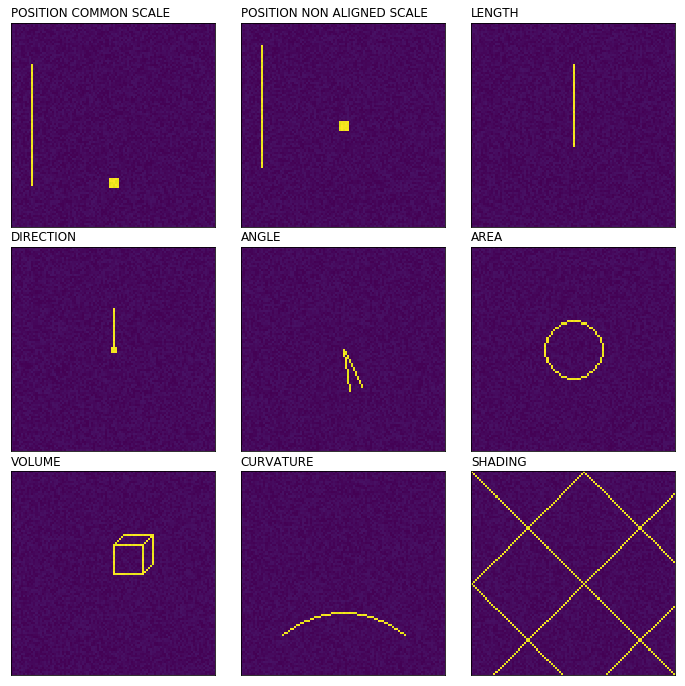

In [35]:
#
# create nine figures of elementary perceptual tasks
#
from matplotlib import gridspec
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']


fig = plt.figure(figsize=(12,12), facecolor='white')
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], hspace=.1, wspace=.1)

for j in range(len(experiments)):
  

    fig = plt.subplot(gs[j])

    sparse, image, label, parameters = eval(experiments[j])()
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    plt.title(experiments[j].split('.')[-1].replace('_',' ').upper(), loc='left')
            
    plt.imshow(image)
    
plt.savefig('../PAPER/gfx/figure1_overview.pdf', bbox_inches='tight', pad_inches=0)

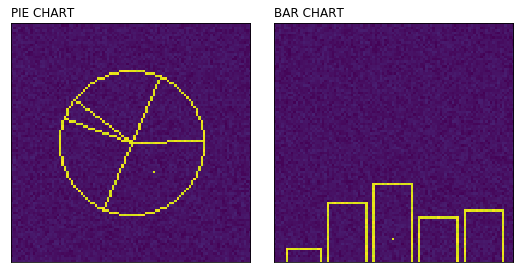

In [39]:
#
# position angle
#
X_bar = np.zeros((1, 100, 100), dtype=np.float32)
X_pie = np.zeros((1, 100, 100), dtype=np.float32)
y = np.zeros((1,5), dtype=np.float32)

for n in range(1):
    data,label = C.Figure3.generate_datapoint()

    image = C.Figure3.data_to_piechart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_pie[n] = image
    
    image = C.Figure3.data_to_barchart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_bar[n] = image
    
    y[n] = label
    
X_min = X_bar.min()
X_max = X_bar.max()
X_bar -= X_min
X_bar /= (X_max - X_min)
X_bar -= .5

X_min = X_pie.min()
X_max = X_pie.max()
X_pie -= X_min
X_pie /= (X_max - X_min)
X_pie -= .5

fig3_titles = ['Pie Chart', 'Bar Chart']
fig3_images = [X_pie[0], X_bar[0]]

fig = plt.figure(figsize=(9,9), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], hspace=.1, wspace=.1)

for j in range(2):
  
    fig = plt.subplot(gs[j])

    image = fig3_images[j]
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    plt.title(fig3_titles[j].upper(), loc='left')
            
    plt.imshow(image)
plt.savefig('../PAPER/gfx/figure3_overview.pdf', bbox_inches='tight', pad_inches=0)

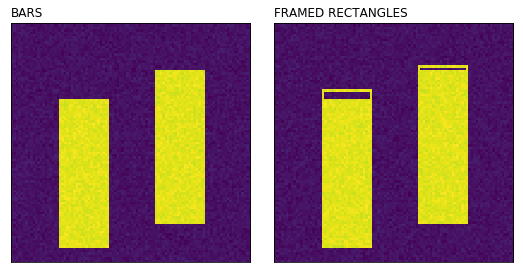

In [50]:
#
# position angle
#
X_framed = np.zeros((1, 100, 100), dtype=np.float32)
X_noframed = np.zeros((1, 100, 100), dtype=np.float32)
y = np.zeros((1,5), dtype=np.float32)

for n in range(1):
    data,label = C.Figure3.generate_datapoint()

    a = C.Figure12(True)
    a.create()    
    a.framed = False
    
    image = a.to_image()
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_noframed[n] = image
    

#     a = C.Figure12(True)
#     a.create()
    a.framed = True
    
    image = a.to_image()
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_framed[n] = image
    
    y[n] = label
    
X_min = X_framed.min()
X_max = X_framed.max()
X_framed -= X_min
X_framed /= (X_max - X_min)
X_framed -= .5

X_min = X_noframed.min()
X_max = X_noframed.max()
X_noframed -= X_min
X_noframed /= (X_max - X_min)
X_noframed -= .5

fig3_titles = ['Bars', 'Framed Rectangles']
fig3_images = [X_noframed[0], X_framed[0]]

fig = plt.figure(figsize=(9,9), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], hspace=.1, wspace=.1)

for j in range(2):
  
    fig = plt.subplot(gs[j])

    image = fig3_images[j]
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    plt.title(fig3_titles[j].upper(), loc='left')
            
    plt.imshow(image)
plt.savefig('../PAPER/gfx/figure12_overview.pdf', bbox_inches='tight', pad_inches=0)